# Fun With STL

STL is a very common file format for 3D objects designed for 3D printing. To learn more about the file format and its history, check out https://all3dp.com/what-is-stl-file-format-extension-3d-printing/.

This notebook will explore the capabilities of the [numpy-stl](https://numpy-stl.readthedocs.io/en/latest/) python library for interacting with stl files.


In [3]:
# ask matplotlib to show figures in notebook
%pylab inline
# ask jupyter to pretty print things
%pprint

Populating the interactive namespace from numpy and matplotlib
Pretty printing has been turned ON


## Quickstart

### Plotting

This example is taken straight from [the numpy-stl quickstart instructions](https://numpy-stl.readthedocs.io/en/latest/usage.html#initial-usage). The only change is that we use one of the Thingi10k models.

C:\Users\jcworkma\Documents\personal\gradschool\berkeley\W210\3d-form\.3d-form\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  


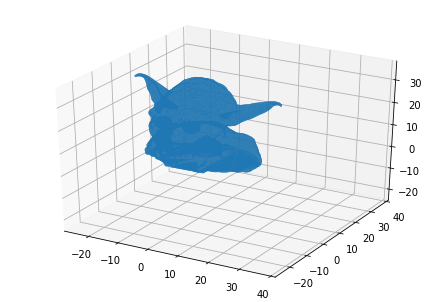

In [21]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('../data/processed/37861_yoda.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

### Modifying

C:\Users\jcworkma\Documents\personal\gradschool\berkeley\W210\3d-form\.3d-form\lib\site-packages\ipykernel_launcher.py:69: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


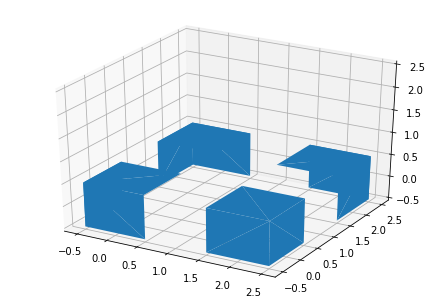

In [9]:
from stl import mesh
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Right face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2


# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

### Exploring the Mesh Object

In [16]:
model = mesh.Mesh.from_file('../data/processed/37861_yoda.stl')
model

In [17]:
model.__dict__.keys()

dict_keys(['speedups', 'name', 'data'])

In [18]:
# file name
# the extra binary is extra header info
model.name

b'092311 - replicant - g - yoda - lk1.stl\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [19]:
# this is some flag for speeding up execution of numpy-stl
model.speedups

True

In [24]:
# these are the vertices
# each element in the array is a length 3 tuple
# (normal vector, vertices, attrs)
# from the code, attrs is always empty
model.data

array([([-0.03431365,  0.0769454 , -0.06179484], [[-3.8814151,  6.39319  , 16.244833 ], [-4.3469315,  6.2466817, 16.320898 ], [-4.3847075,  6.3675375, 16.492361 ]], [0]),
       ([ 0.01851021,  0.04470879,  0.04096463], [[ 3.0408778, 16.11172  ,  5.0861425], [ 3.0669327, 15.875168 ,  5.3325415], [ 3.2446575, 15.833855 ,  5.297324 ]], [0]),
       ([ 0.4561131 , -0.14415653,  0.24120784], [[ 7.851582 , -3.2437444, 29.76174  ], [ 8.051557 , -3.5191286, 29.219015 ], [ 8.215932 , -2.5392964, 29.49378  ]], [0]),
       ...,
       ([-0.00355939,  0.00384505, -0.00076373], [[ 3.3700223,  1.3644854,  5.2962484], [ 3.3746119,  1.3596653,  5.2505913], [ 3.2903962,  1.2817061,  5.2505913]], [0]),
       ([-0.00355433,  0.0038396 , -0.00076269], [[ 3.2859259,  1.2866371,  5.2962484], [ 3.3700223,  1.3644854,  5.2962484], [ 3.2903962,  1.2817061,  5.2505913]], [0]),
       ([-0.00393712,  0.00425312, -0.00103038], [[ 3.3638215,  1.3709977,  5.3468227], [ 3.3700223,  1.3644854,  5.2962484], [ 3.285

In [25]:
# this is the number of vertices
len(model.data)

89466

## STL Metrics

Now that we know how to programmatically interact with STL files, can we gather information about the STL files we've downloaded? The Thingi10k repo unfortunately comes with no extra data beyond the STL files themselves. Lucky for us, Thingi10k has unknowingly exposed the API it uses to show common file metrics on its website.

Example object with metrics: https://ten-thousand-models.appspot.com/detail.html?file_id=32770

### The Thingi10k API

By using the Chrome Developer Tools, we can monitor network traffic during page load to sniff out the path to the Thingi10k API. For the example linked above, the API endpoint is https://ten-thousand-models.appspot.com/api/v1/model/32770.

The final number is the file id, meaning that we can iterate through the files, create the api endpoint, and extract data for each.

### Retrieving Metrics PoC

In [10]:
import requests


def api_json(url):
    print('api_query: {}'.format(url))
    resp = requests.get(url=url)
    data = None
    if resp.status_code != 200:
        print('failed to retrieve data from {0}'.format(url))
        print('status_code={0}'.format(resp.status_code))
    else:
        data = resp.json()
    return data


def thingi10k_api_data(file_id):
    url = 'https://ten-thousand-models.appspot.com/api/v1/model/{}'.format(file_id)
    return api_json(url)


data = thingi10k_api_data(32770)
data

api_query: https://ten-thousand-models.appspot.com/api/v1/model/32770


{'orientable': 1,
 'ave_dihedral_angle': 0.0870997,
 'subcategory': 'None',
 'median_area': 0.0498815,
 'min_valance': 3.0,
 'total_area': 8841.26,
 'p95_dihedral_angle': 0.325493,
 'p90_valance': 6.0,
 'p75_dihedral_angle': 0.0718022,
 'num_complanar_intersecting_faces': 0,
 'num_boundary_edges': 0,
 'vertex_manifold': 1,
 'p95_valance': 7.0,
 'num_connected_components': 1,
 'ave_valance': 5.99937,
 'p95_area': 1.04975,
 'category': 'None',
 'euler_characteristic': 2,
 'max_area': 60.1549,
 'author': 'BrianEnigma',
 'min_dihedral_angle': 5.29428e-24,
 'median_valance': 6.0,
 'p75_aspect_ratio': 1.76379,
 'p90_dihedral_angle': 0.170165,
 'p75_valance': 6.0,
 'num_vertices': 18944,
 'min_aspect_ratio': 1.00003,
 'p95_aspect_ratio': 3.41081,
 'num_faces': 37884,
 'p25_valance': 6.0,
 'num_self_intersections': 0,
 'publish_time': '2011-07-26T09:23:59',
 'p90_aspect_ratio': 2.51872,
 'tags': ['cat', '3D', 'makerbot', 'octocat', 'octopus'],
 'p75_area': 0.0687898,
 'max_valance': 34.0,
 'p9

It works!

### Retrieving Rendered Image PoC

Another nice-to-have would be a pre-rendered image of the STL object. Those are available on the website, so perhaps we can scrape those, too?

The url of the image for the example object above is https://storage.googleapis.com/thingi10k/renderings/32770.png.

img_query: https://storage.googleapis.com/thingi10k/renderings/32770.png


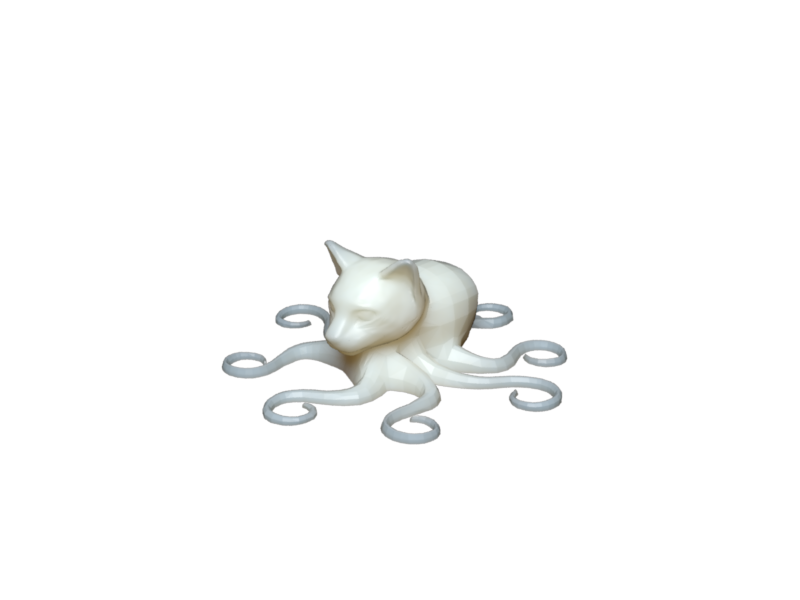

In [30]:
# https://stackoverflow.com/questions/3042757/downloading-a-picture-via-urllib-and-python
# https://docs.python.org/3.0/library/urllib.request.html#urllib.request.urlretrieve
import urllib.request
import shutil


def thingi10k_image(file_id, dest):
    url = 'https://storage.googleapis.com/thingi10k/renderings/{}.png'.format(file_id)
    print('img_query: {}'.format(url))
    filename, headers = urllib.request.urlretrieve(url)
    shutil.move(filename, dest)
    return dest


img = thingi10k_image(32770, '_output/thingi10k_octocat.png')


from IPython.display import Image
Image(img)

### Building a Thingi10k Model Index

Now that we know how to 

1. Read and manipulate STL files
2. Render STL meshes in python
3. Download additional data on each model
4. Download a rendered image of each model

We can build an index combining this information for easy retrieval. The index will be a csv file with a column for each attribute seen in the Thingi10k API and additional columns for STL file path and image path.

The index will live in the processed dir. The images and json will live in the raw dir.

In [57]:
import json
import csv
import os

rows = list()
header = ['file', 'name', 'num_vertices']

mesh_dir = '../data/external/Thingi10k/raw_meshes'
raw_dir = '../data/raw'
proc_dir = '../data/processed'

fields = list()
data = list()

for path in os.listdir(mesh_dir)[:10]:
    
    # quick check that we are reading something that we care about
    if not path.endswith('.stl'):
        print('not an stl file: {}'.format(path))
        continue
    
    # get file ids
    file_id = os.path.splitext(path)[0]
    
    # get api data
    file_data = thingi10k_api_data(file_id)
    stl_name = '{}.json'.format(file_id)
    with open(os.path.join(raw_dir, stl_name), 'w') as outfile:
        json.dump(data, outfile)

    # gather object images
    img_name = '{}.png'.format(file_id)
    dest = os.path.join(raw_dir, img_name)
    dest = thingi10k_image(file_id, dest)
        
    # done
    file_data['stl_file'] = stl_name
    file_data['img_file'] = img_name
    fields = list(set(fields).union(set(file_data.keys())))
    data.append(file_data)


api_query: https://ten-thousand-models.appspot.com/api/v1/model/100026
img_query: https://storage.googleapis.com/thingi10k/renderings/100026.png
api_query: https://ten-thousand-models.appspot.com/api/v1/model/100027
img_query: https://storage.googleapis.com/thingi10k/renderings/100027.png
api_query: https://ten-thousand-models.appspot.com/api/v1/model/100028
img_query: https://storage.googleapis.com/thingi10k/renderings/100028.png
api_query: https://ten-thousand-models.appspot.com/api/v1/model/100029
img_query: https://storage.googleapis.com/thingi10k/renderings/100029.png
api_query: https://ten-thousand-models.appspot.com/api/v1/model/100030
img_query: https://storage.googleapis.com/thingi10k/renderings/100030.png
api_query: https://ten-thousand-models.appspot.com/api/v1/model/100036
img_query: https://storage.googleapis.com/thingi10k/renderings/100036.png
api_query: https://ten-thousand-models.appspot.com/api/v1/model/100037
img_query: https://storage.googleapis.com/thingi10k/renderi

In [62]:
# write index
index_path = '_output/thingi10k.csv'
with open(index_path, 'w', newline='') as csvfile:

    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()
    for i, obj in enumerate(data):
        # https://stackoverflow.com/questions/1285911/how-do-i-check-that-multiple-keys-are-in-a-dict-in-a-single-passs
        # make sure that this obj has all the right fields
        if set(fields) <= set(obj):
            for f in fields:
                if not obj.get(f, None):
                    obj[f] = None
        
        writer.writerow(obj)

In [63]:
import pandas as pd


df = pd.read_csv(index_path)
df

,num_geometric_degenerated_faces,max_aspect_ratio,p95_dihedral_angle,min_dihedral_angle,min_aspect_ratio,min_valance,orientable,p25_area,euler_characteristic,solid,...,p75_valance,num_complanar_intersecting_faces,stl_file,max_valance,PWN,p75_dihedral_angle,author,ave_dihedral_angle,num_duplicated_faces,p95_aspect_ratio
0,11.0,2.893790e+04,1.57080,NaN,1.105860e+00,3.0,NaN,22.815900,-10.0,NaN,...,8.0,18.0,100026.json,13.0,NaN,1.570800,northshore,0.687029,NaN,781.6520
1,18.0,9.747160e+13,1.57093,NaN,1.058390e+00,3.0,NaN,0.376655,1.0,NaN,...,8.0,45.0,100027.json,18.0,NaN,1.570800,northshore,0.690393,3.0,398.5140
2,NaN,2.554830e+04,1.57080,NaN,1.207110e+00,3.0,1.0,0.429091,6.0,1.0,...,6.0,NaN,100028.json,14.0,1.0,1.570800,northshore,0.643016,NaN,29.4744
3,20.0,3.613400e+05,1.82460,NaN,-7.267120e+14,3.0,NaN,14.552600,-21.0,NaN,...,7.0,26.0,100029.json,15.0,NaN,1.570800,northshore,0.664232,NaN,236.3630
4,5.0,3.073120e+10,1.57315,NaN,1.021720e+00,3.0,NaN,0.784853,15.0,NaN,...,8.0,25.0,100030.json,25.0,NaN,1.570150,northshore,0.539553,5.0,1035.3100
5,1.0,6.555670e+07,1.57080,NaN,1.037250e+00,3.0,NaN,1.744200,9.0,NaN,...,6.0,16.0,100036.json,17.0,NaN,1.570800,northshore,0.591520,7.0,234.0910
6,5.0,3.016650e+04,1.57080,NaN,1.212270e+00,2.0,NaN,0.275247,-7.0,NaN,...,6.0,NaN,100037.json,17.0,NaN,1.570800,northshore,0.568330,NaN,312.2940
7,NaN,2.498760e+02,1.57080,NaN,1.034400e+00,3.0,1.0,0.001958,-2.0,NaN,...,6.0,24.0,100045.json,17.0,1.0,1.570800,bentommye,0.592873,NaN,32.6268
8,NaN,9.172050e+05,0.34432,NaN,1.008430e+00,4.0,1.0,0.051656,NaN,1.0,...,6.0,NaN,100070.json,52.0,1.0,0.157475,FabLabSeoul,0.151410,NaN,35.0734
9,NaN,5.563840e+04,1.57080,NaN,1.033500e+00,2.0,1.0,1.101910,-8.0,NaN,...,6.0,NaN,100071.json,18.0,NaN,1.570800,FabLabSeoul,0.566623,NaN,81.3529
